In [ ]:
!nvidia-smi

Wed Jan 18 20:06:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      3MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6NcHIgpuJljIHk4Zrmey")
project = rf.workspace("yolov5-bzr4l").project("surface-defects-on-concrete-structures-4bwdf")
dataset = project.version(1).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Surface-defects-on-concrete-structures-1 in yolov8:: 100%|██████████| 7918/7918 [00:03<00:00, 1999.34it/s]


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Surface-defects-on-concrete-structures-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [ ]:
!ls {HOME}/runs/segment/train9/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix.png				     val_batch0_labels.jpg
events.out.tfevents.1674073603.bf7bb689da45.13955.0  val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     val_batch2_labels.jpg
MaskR_curve.png					     val_batch2_pred.jpg
predictions.json				     weights


/content


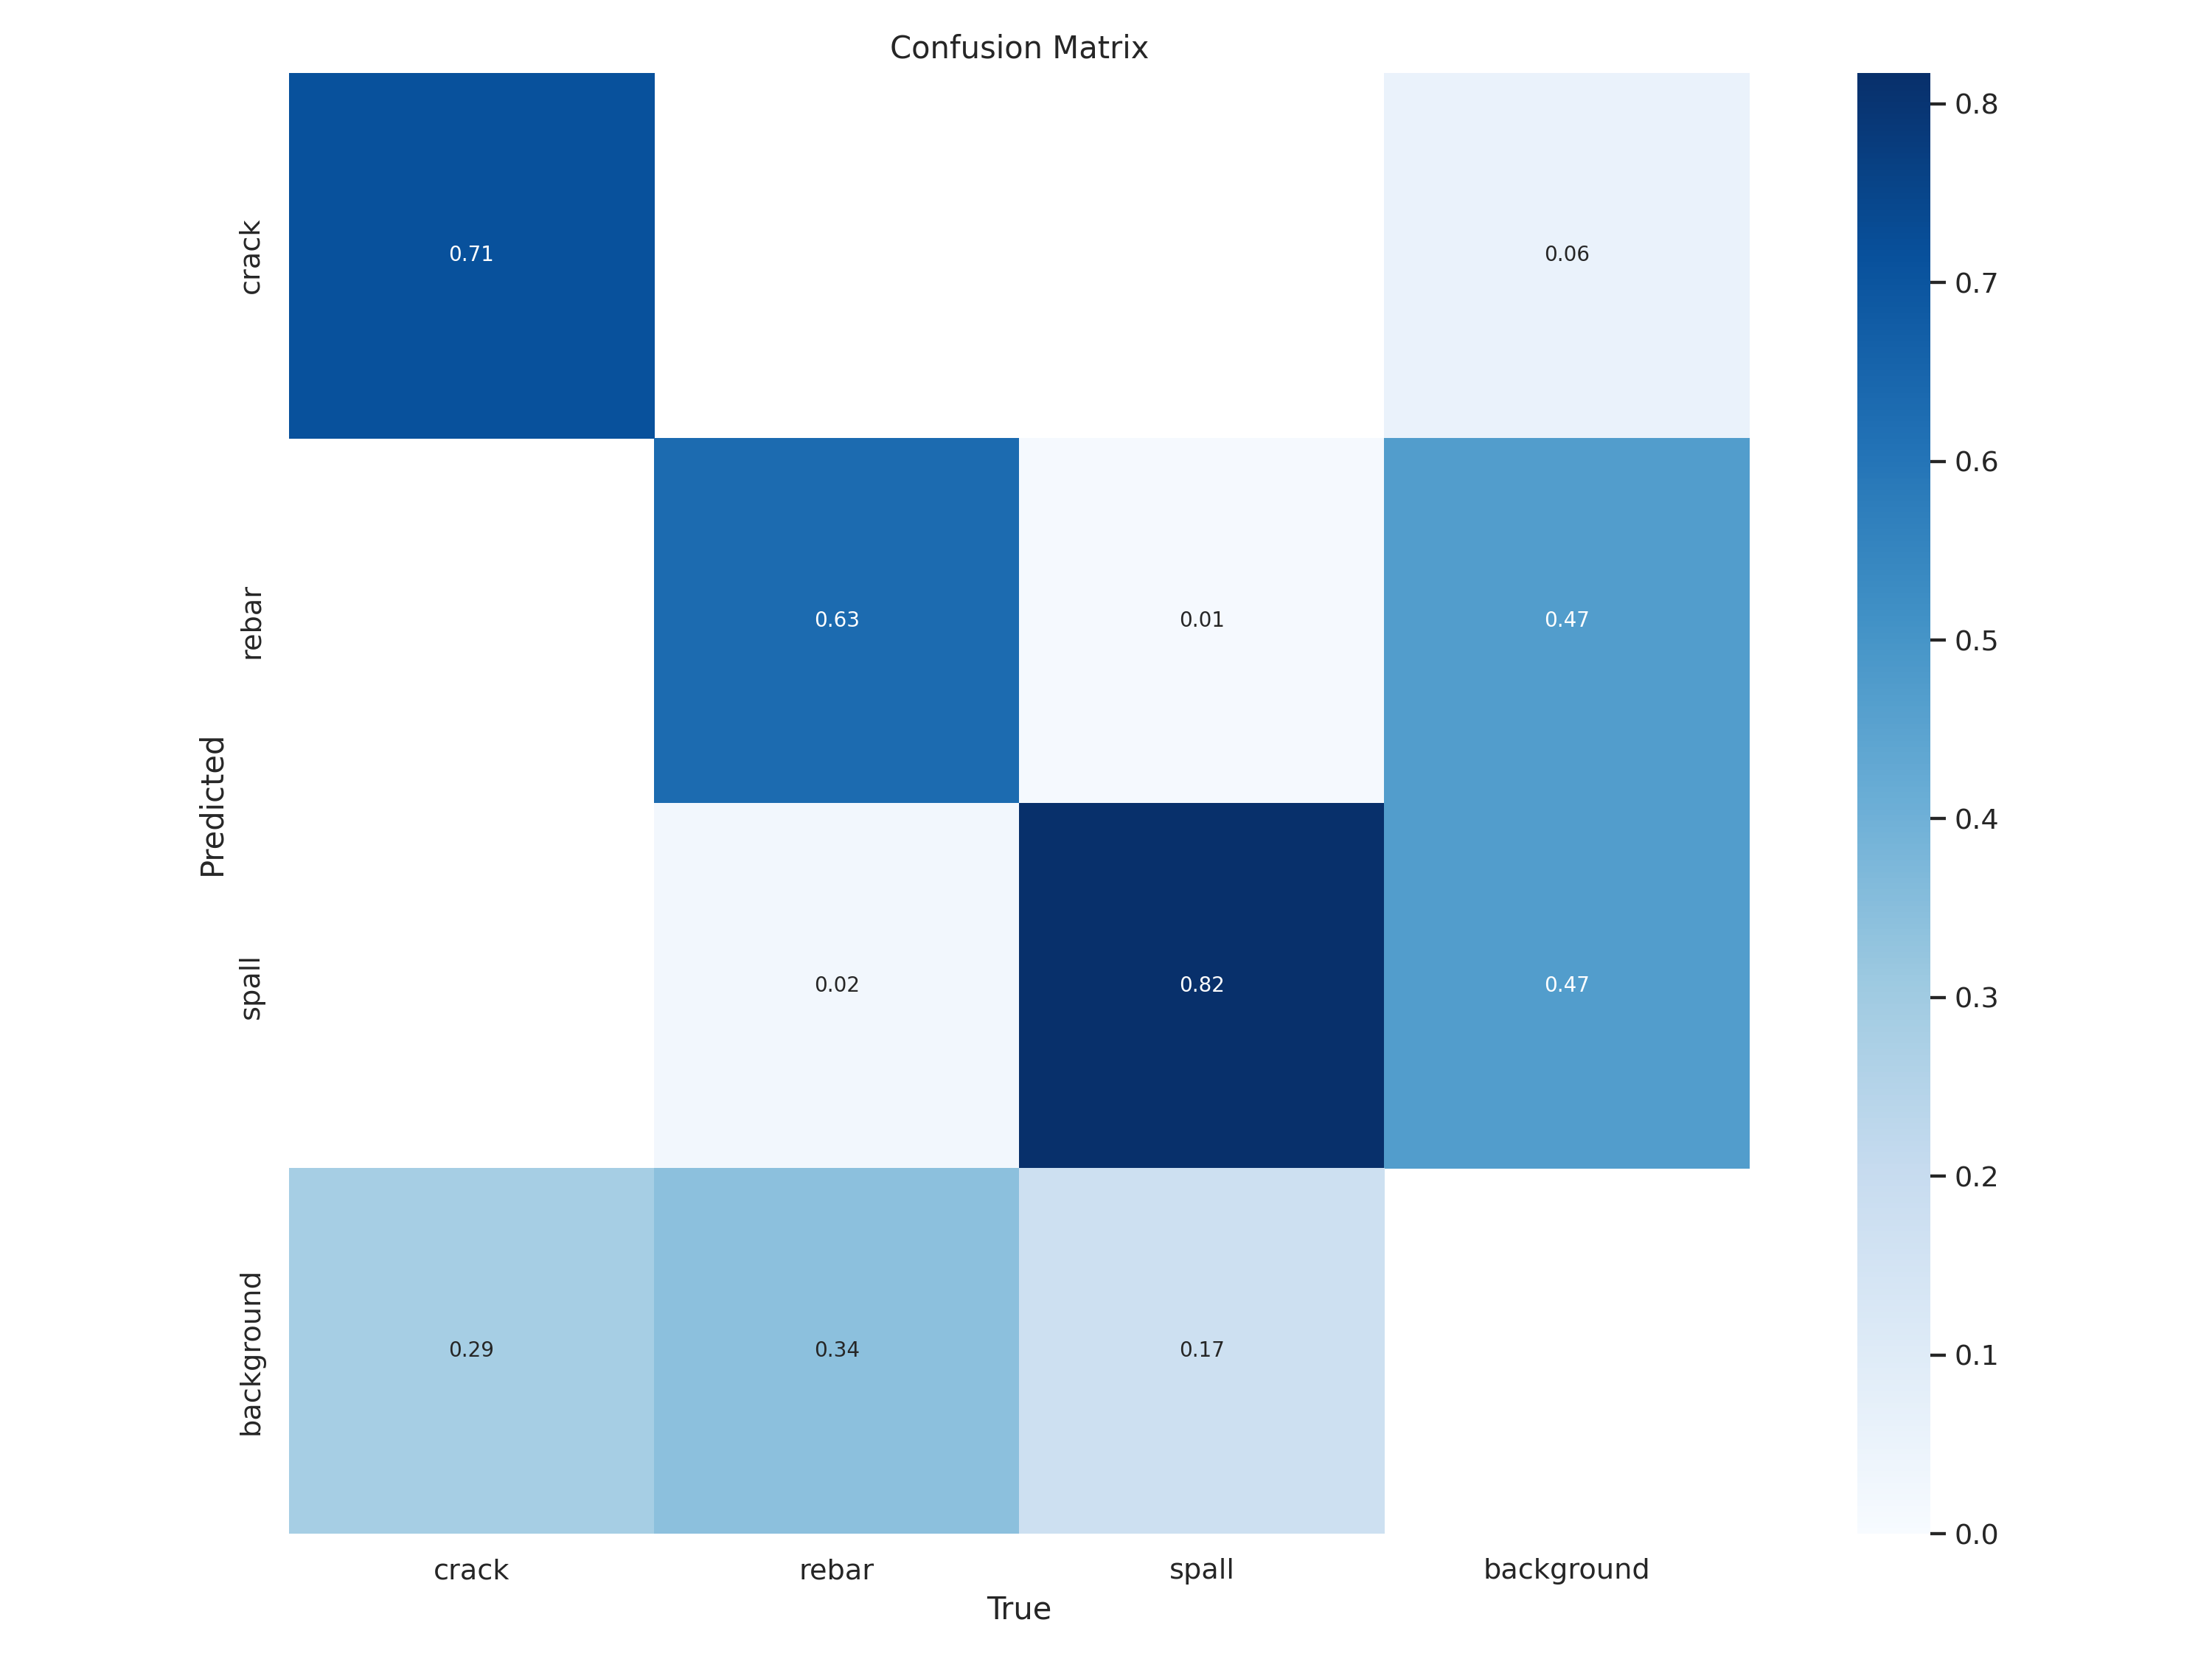

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train9/confusion_matrix.png', width=600)

/content


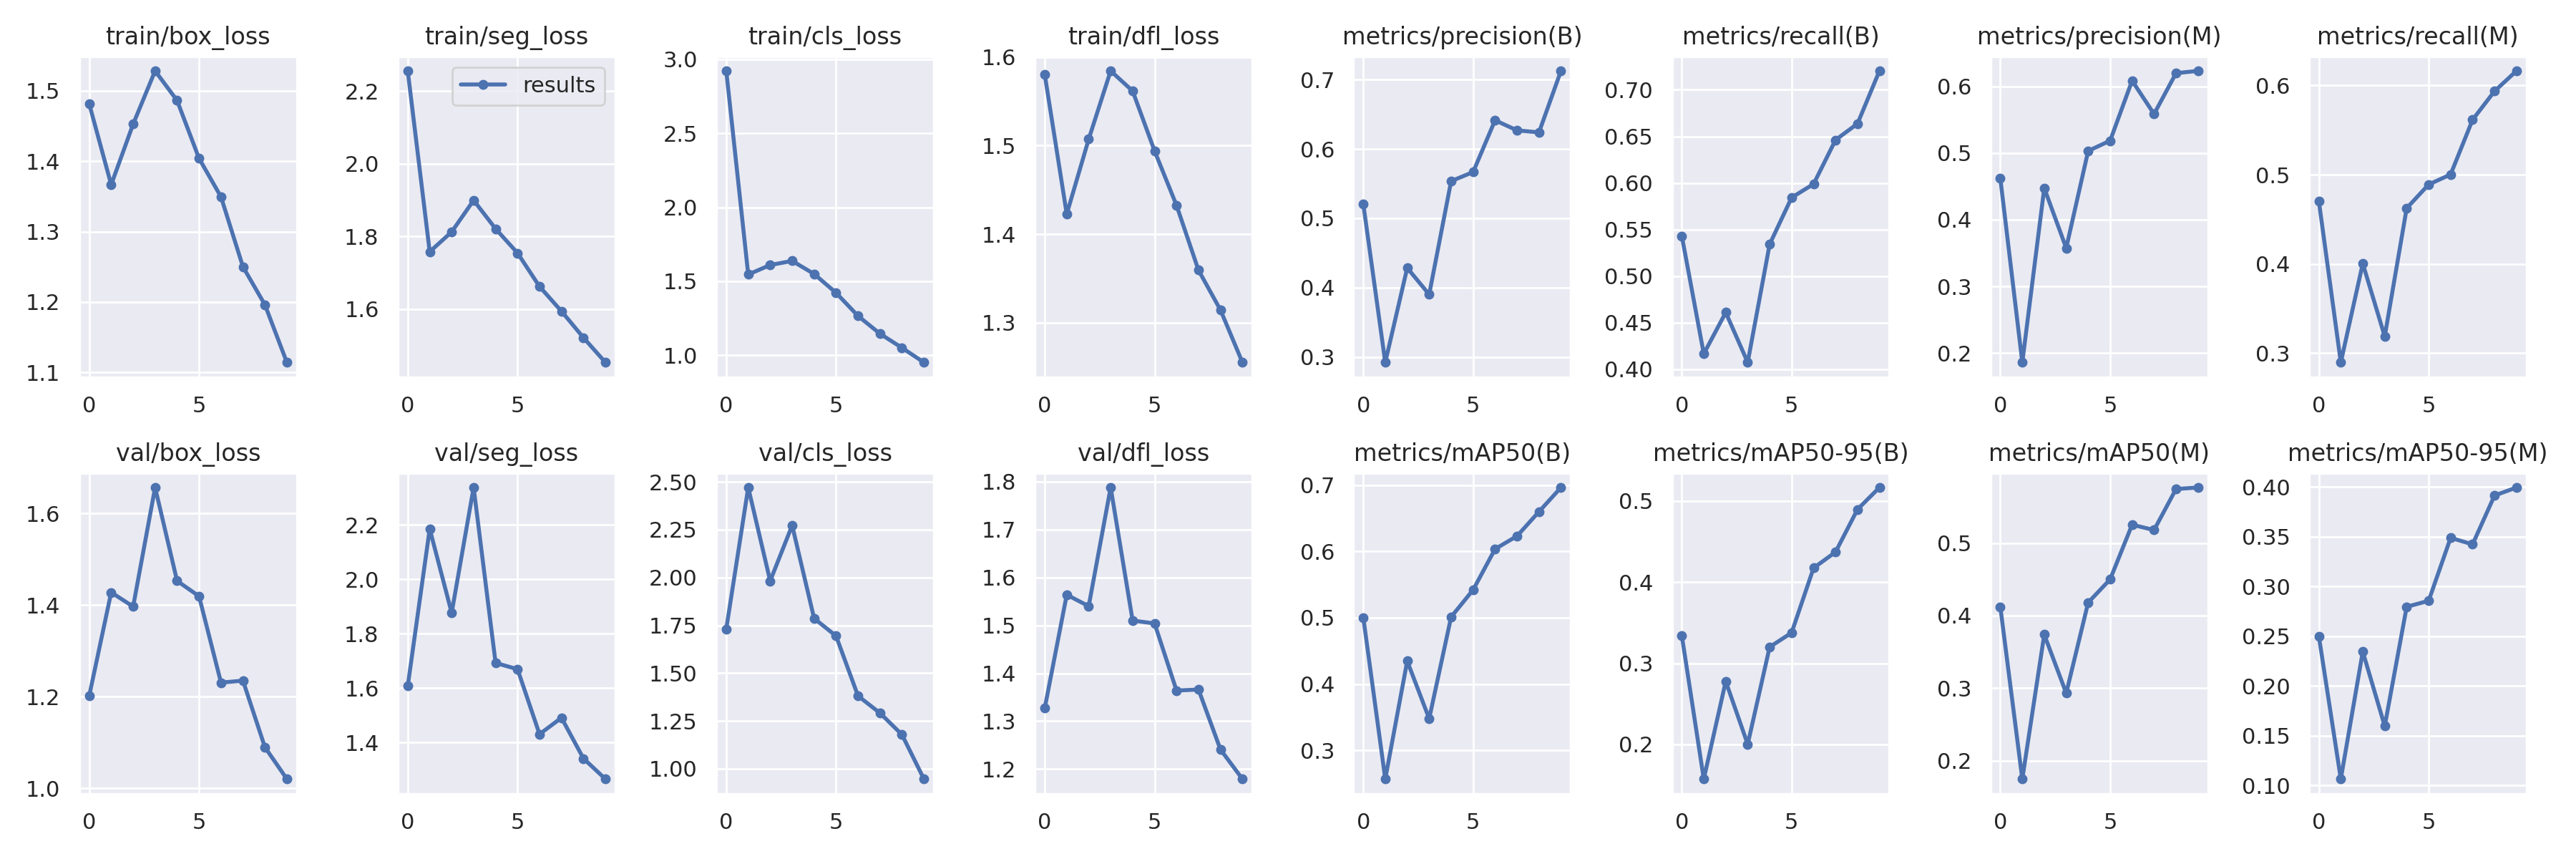

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train9/results.png', width=600)

/content


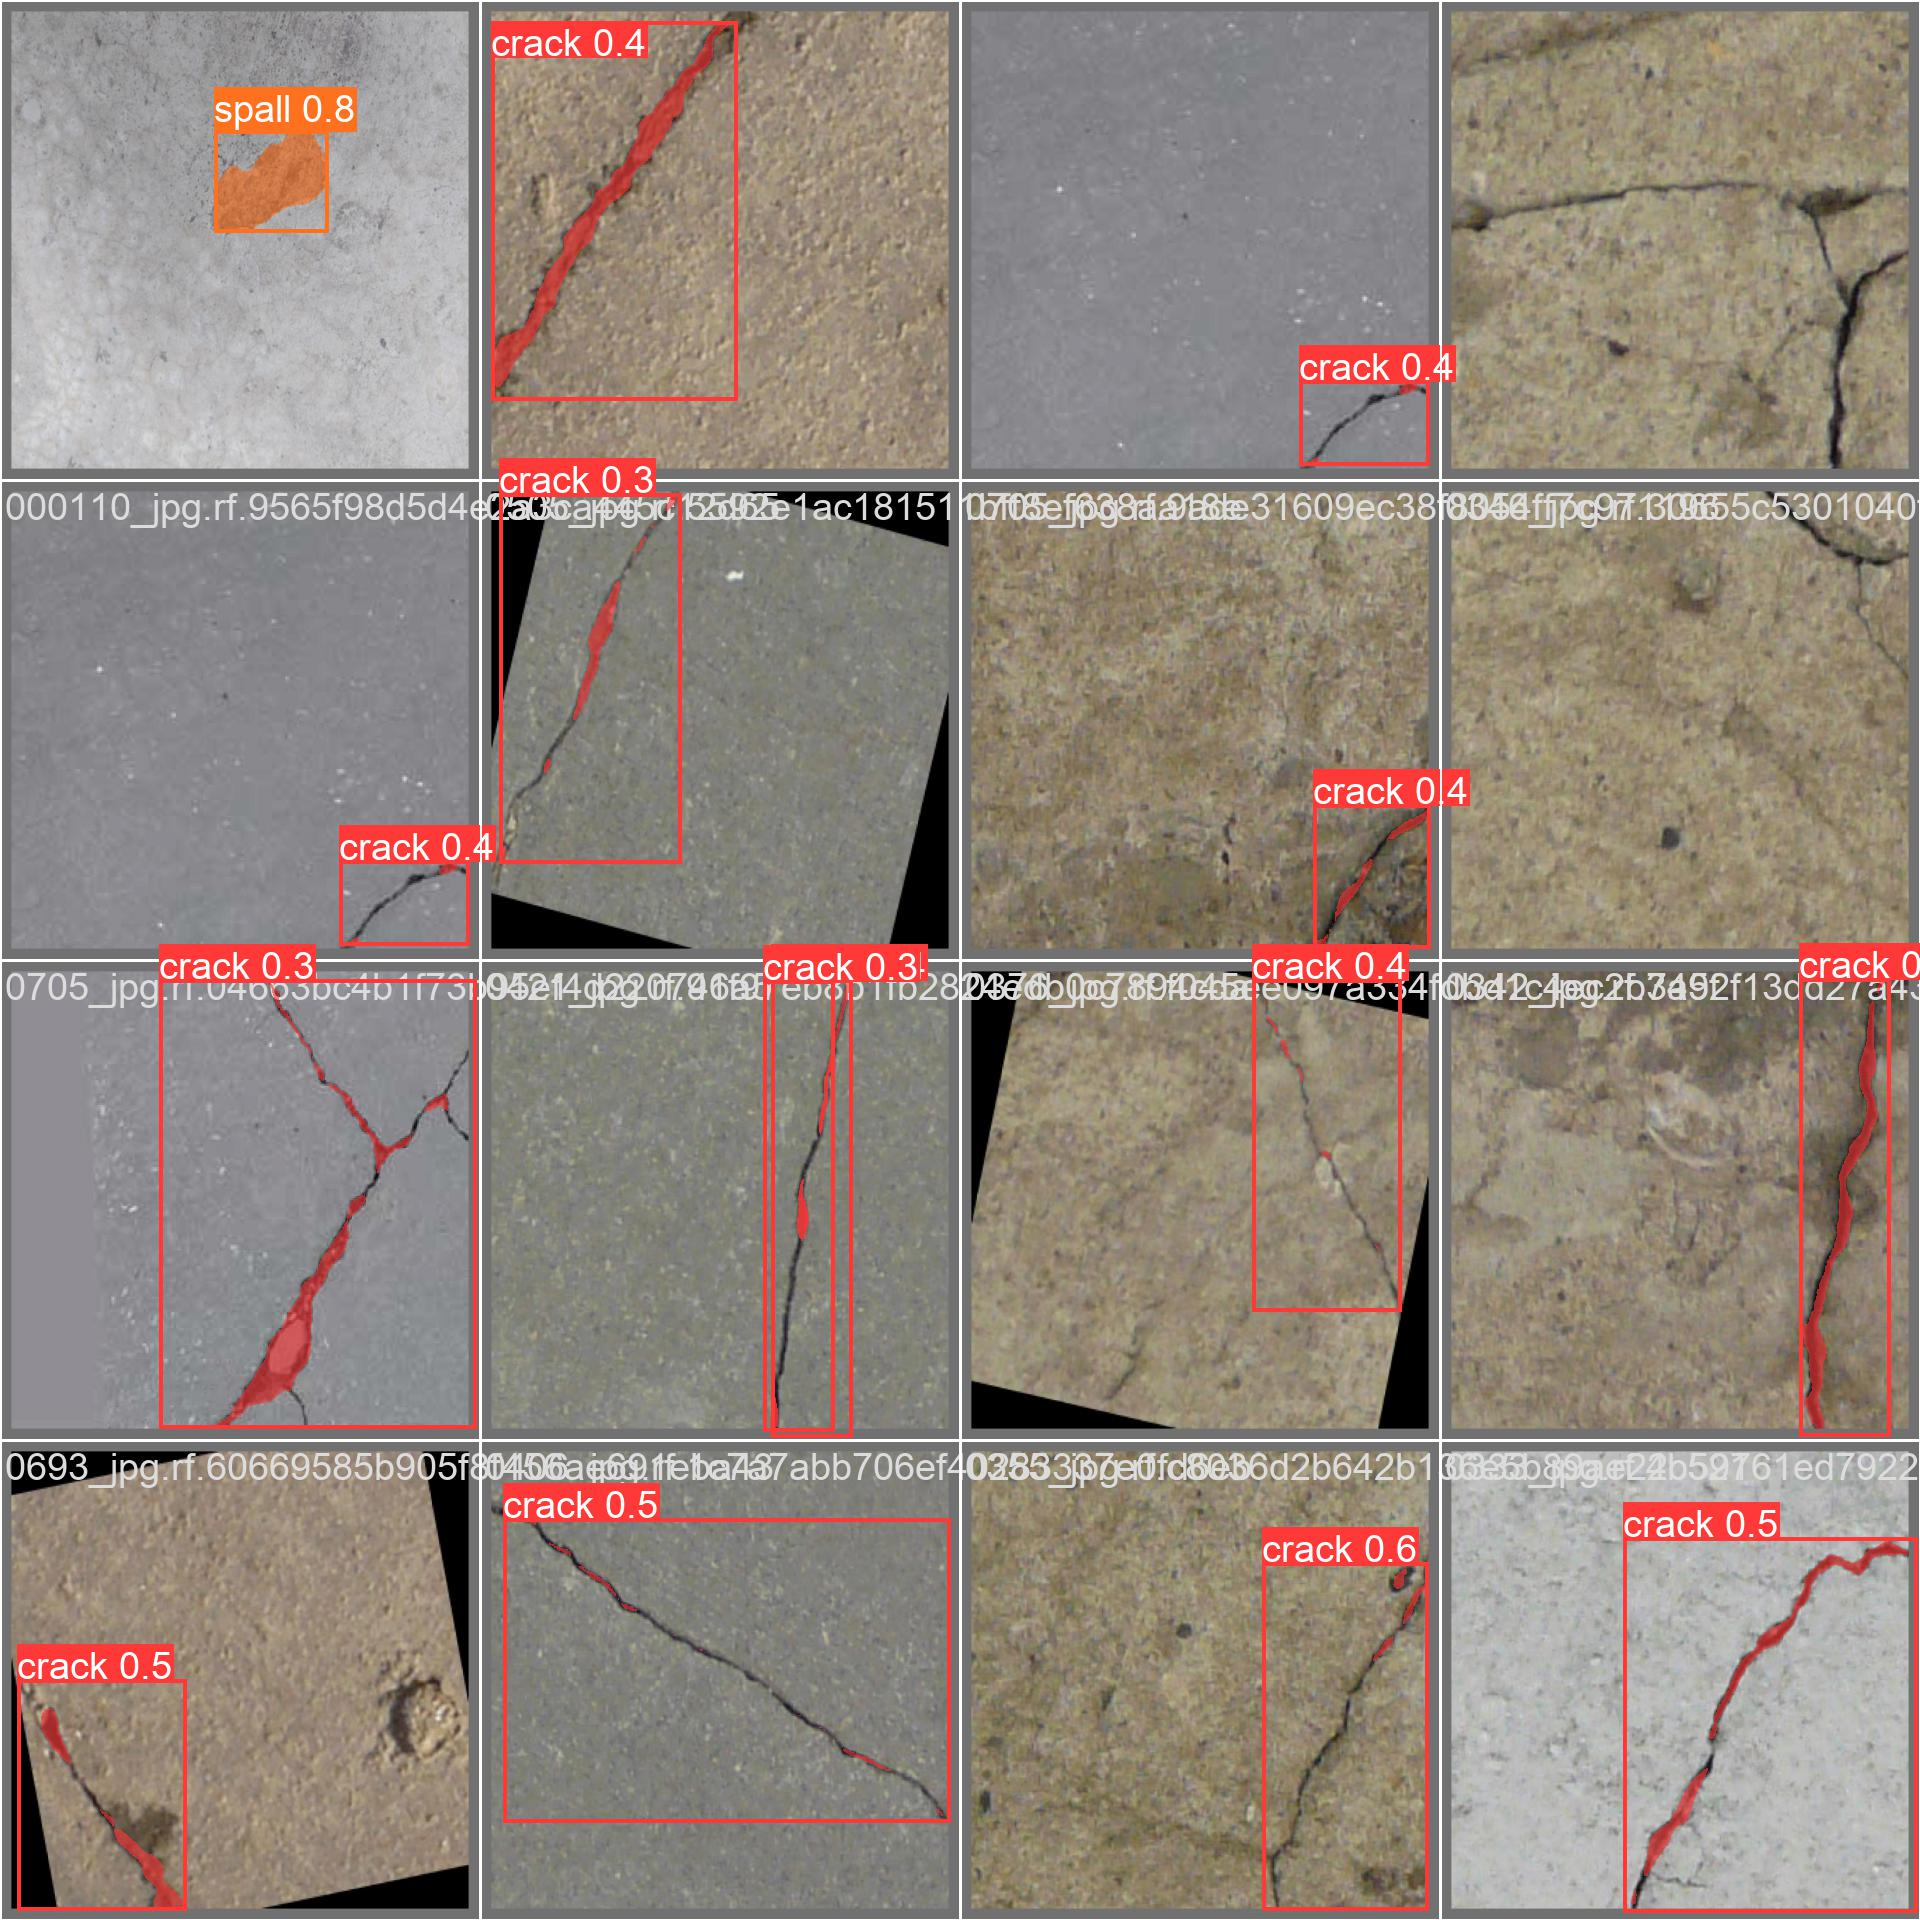

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train9/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train9/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Surface-defects-on-concrete-structures-1/valid/labels.cache... 329 images, 63 backgrounds, 0 corrupt: 100% 329/329 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5% 1/21 [00:01<00:25,  1.30s/it]Exception in thread Thread-3:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.8/dist-packages/sentry_sdk/integrations/threading.py", line 69, in run
    reraise(*_capture_exception())
  File "/usr/local/lib/python3.8/dist-packages/sentry_sdk/_compat.py", line 59, in reraise
    raise value
  File "/usr/local/lib/python3.8/dist-packages/sentry_sdk/integrations/threading

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train9/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
image 1/164 /content/datasets/Surface-defects-on-concrete-structures-1/test/images/000122_jpg.rf.7cdf691bd5168dede1925fe10d0cde05.jpg: 640x640 2 spalls, 21.9ms
image 2/164 /content/datasets/Surface-defects-on-concrete-structures-1/test/images/000132_jpg.rf.a64593ad9e5917c48ce58dfd0da9cb34.jpg: 640x640 1 spall, 21.9ms
image 3/164 /content/datasets/Surface-defects-on-concrete-structures-1/test/images/000137_jpg.rf.7e9d6a8bab966b42cbc9303c5e6223c0.jpg: 640x640 2 spalls, 21.9ms
image 4/164 /content/datasets/Surface-defects-on-concrete-structures-1/test/images/000137_jpg.rf.821329ee9637c83a7155d2fe12fdd027.jpg: 640x640 2 spalls, 21.9ms
image 5/164 /content/datasets/Surface-defects-on-concrete-structures-1/test/images/00018_jpg.rf.8e008bf7b8cddcb5fbd051976c6b29a0.jpg: 640x640 1 rebar, 21.8ms
image 6/164

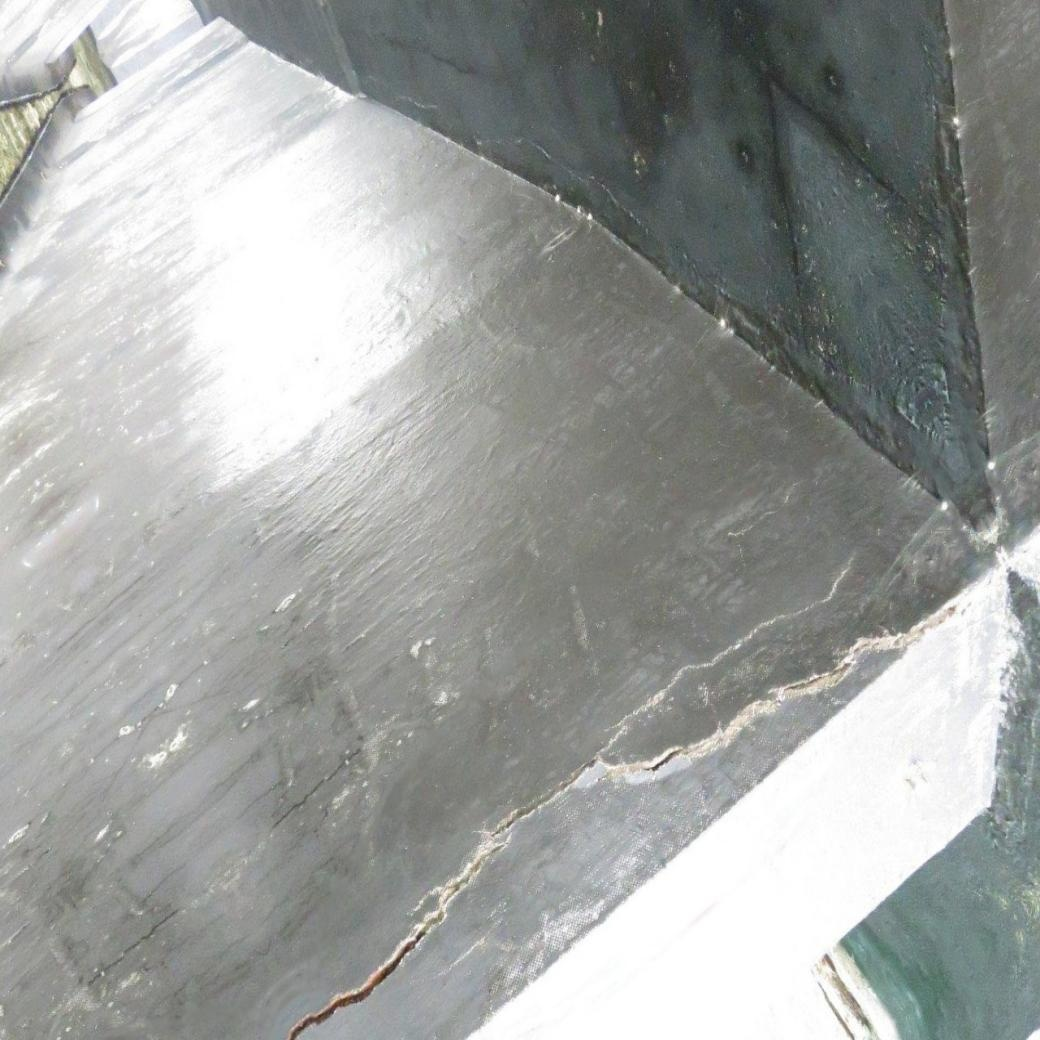

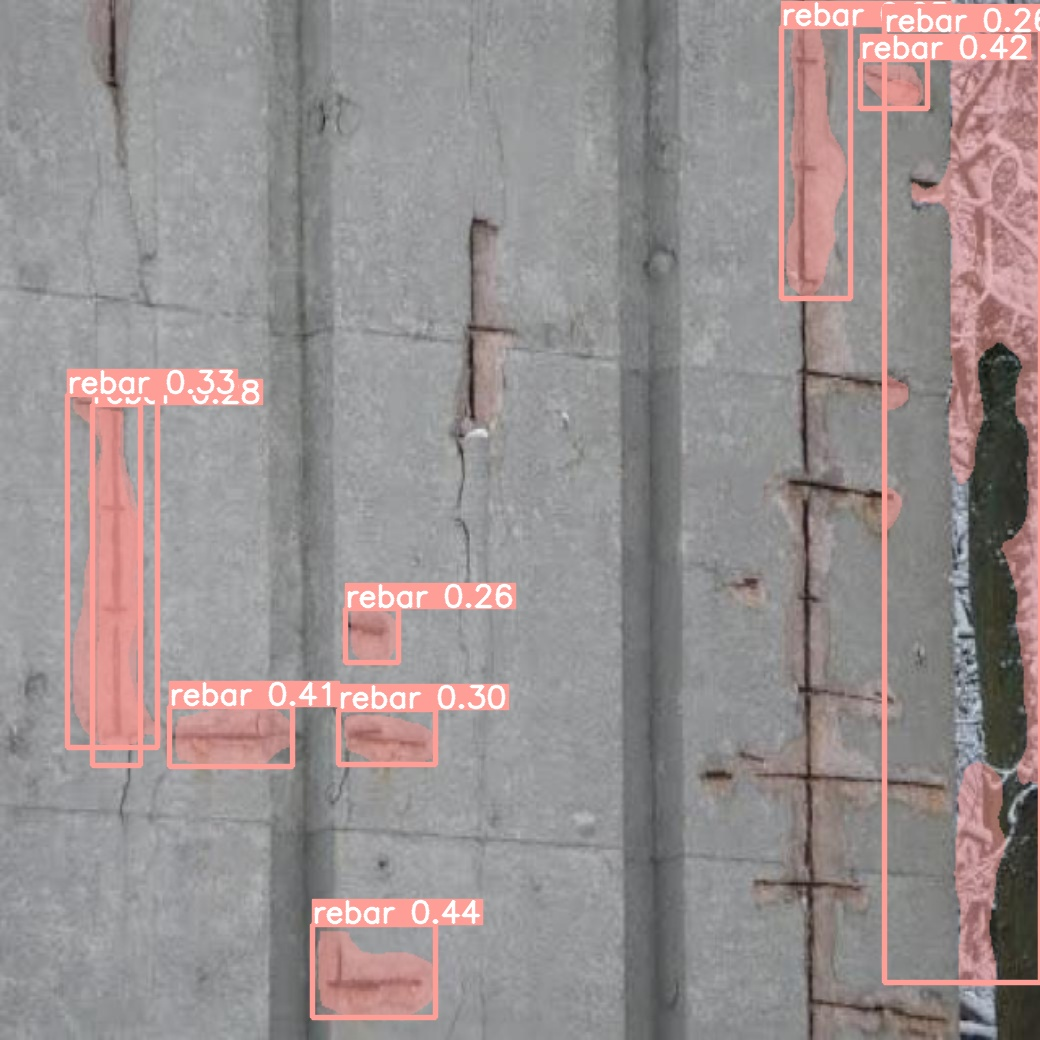

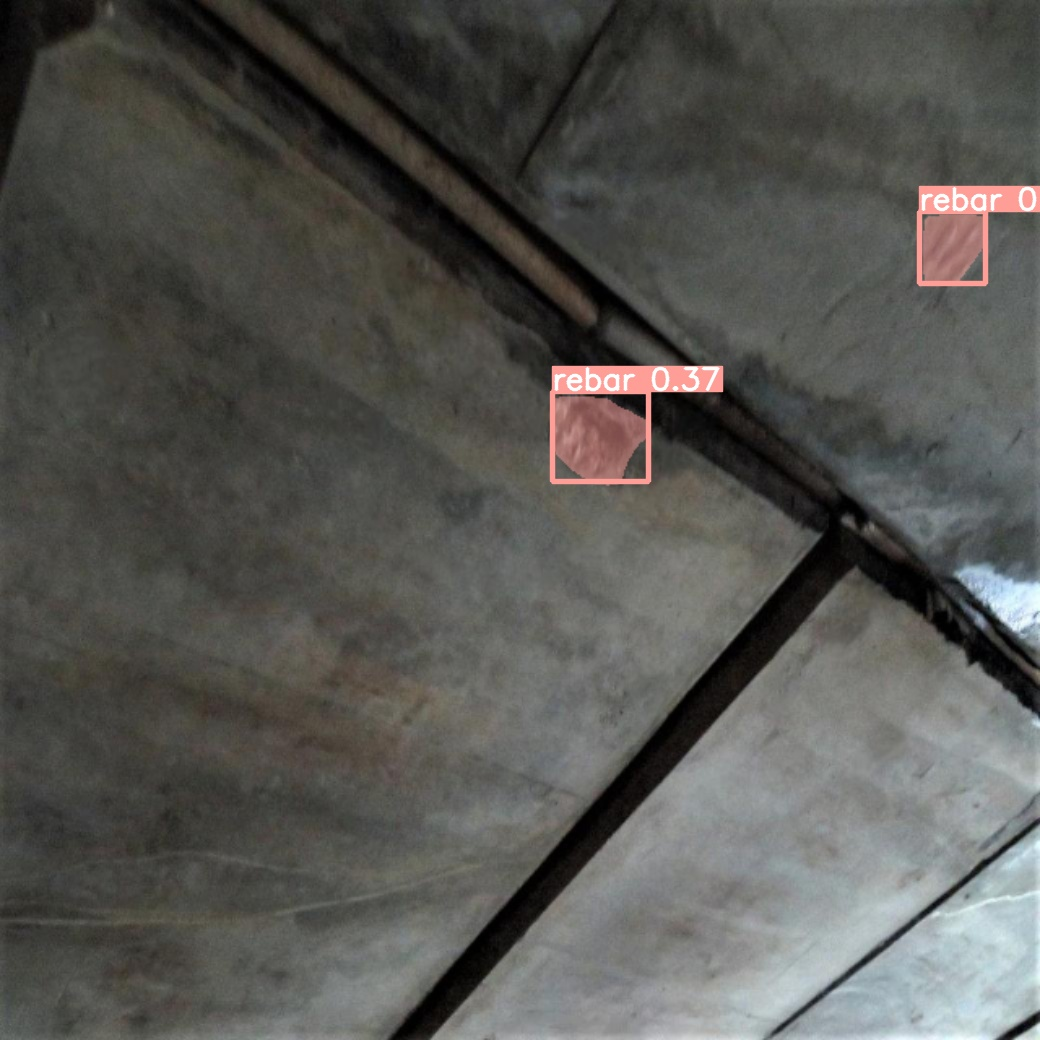

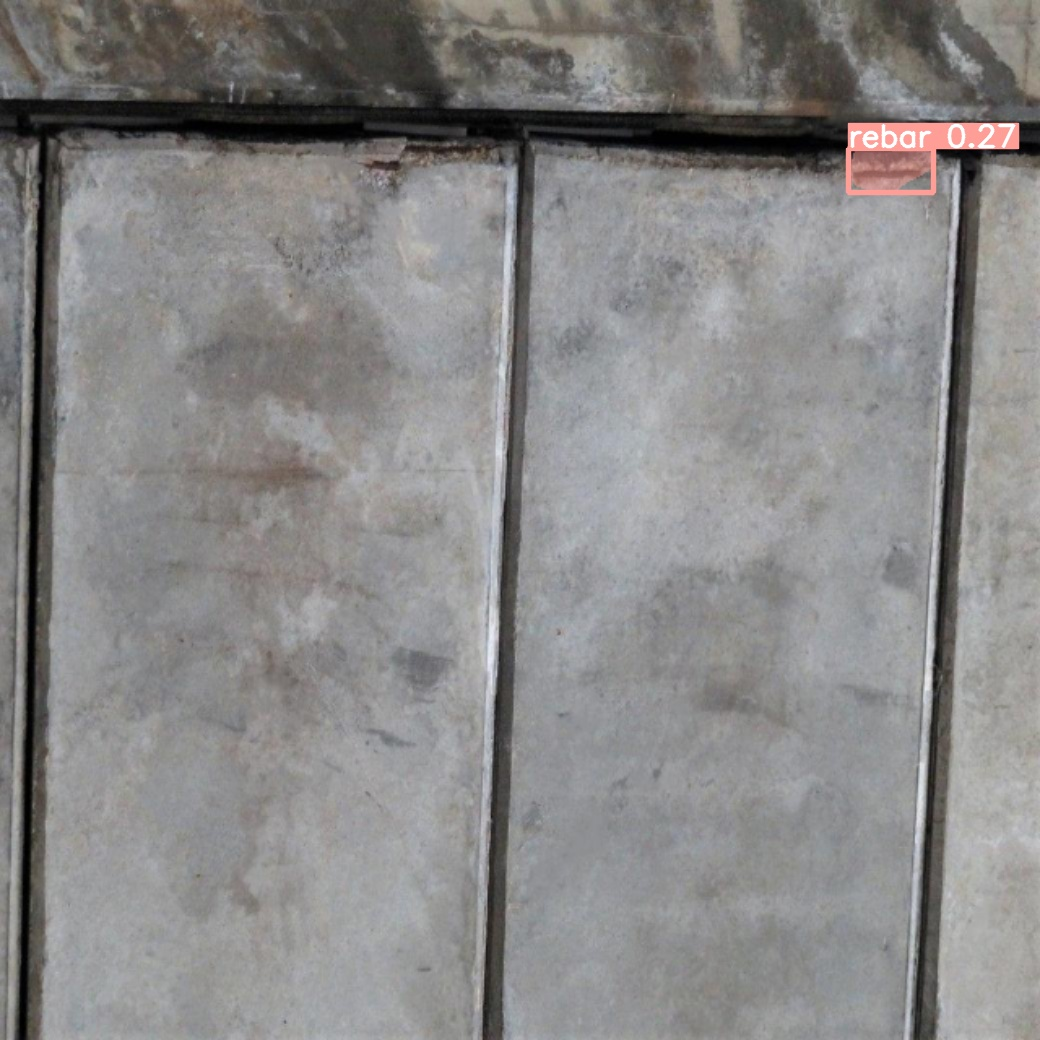

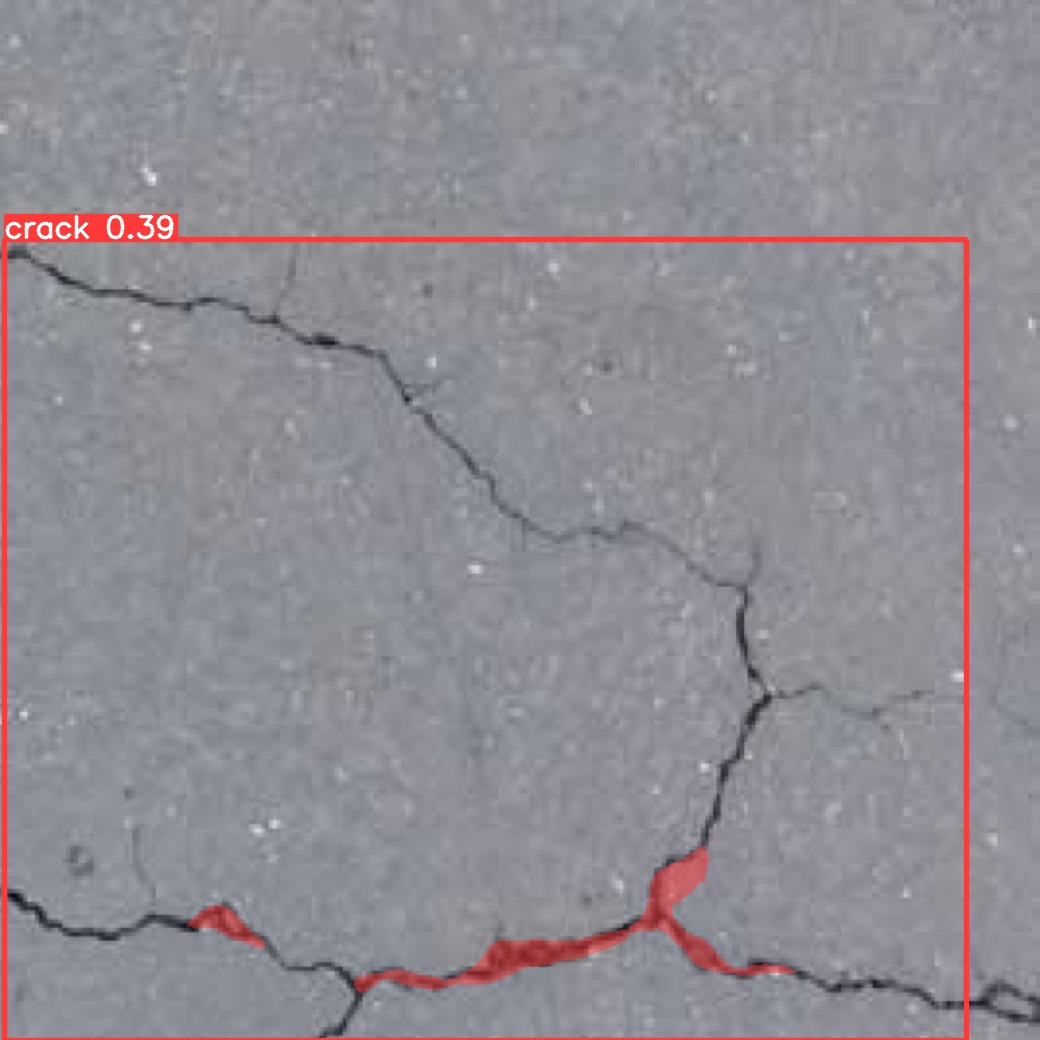

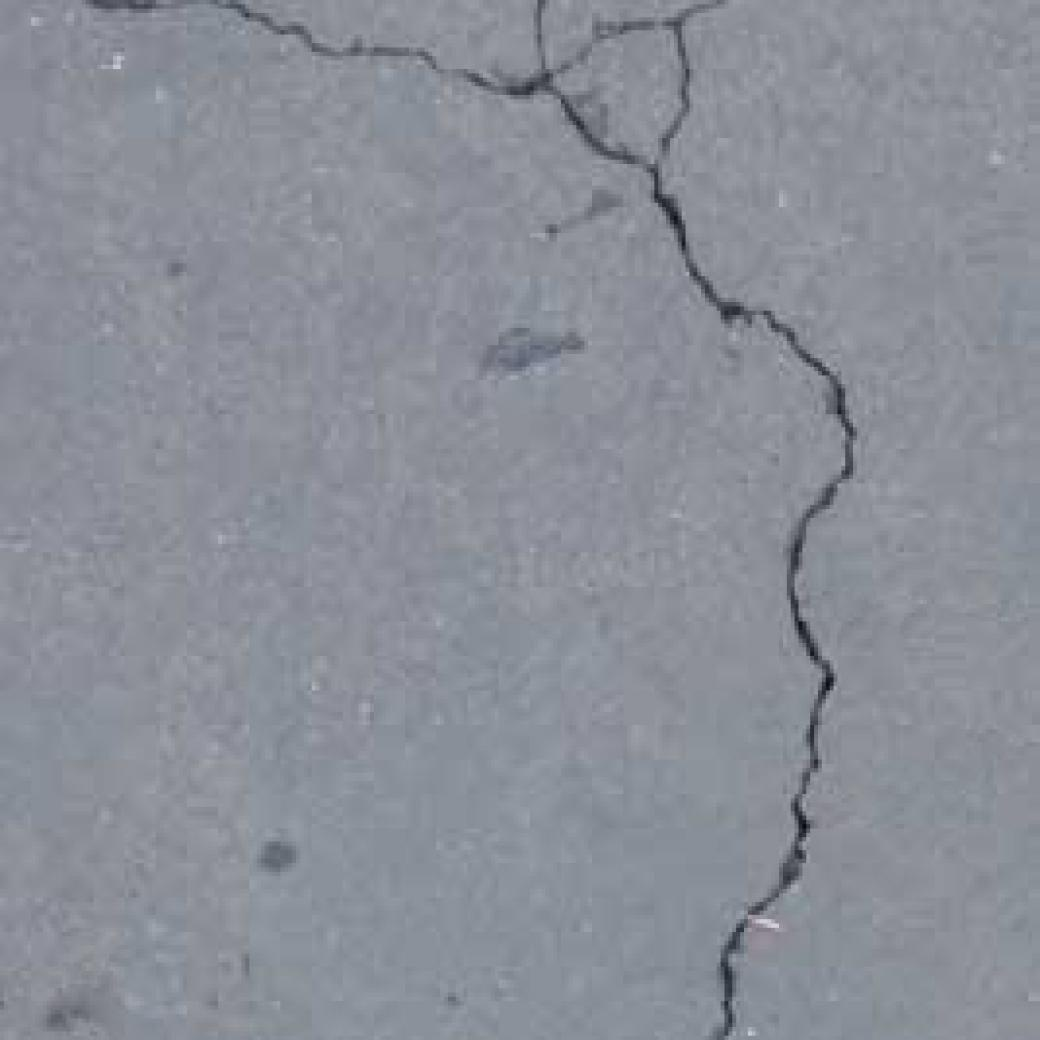

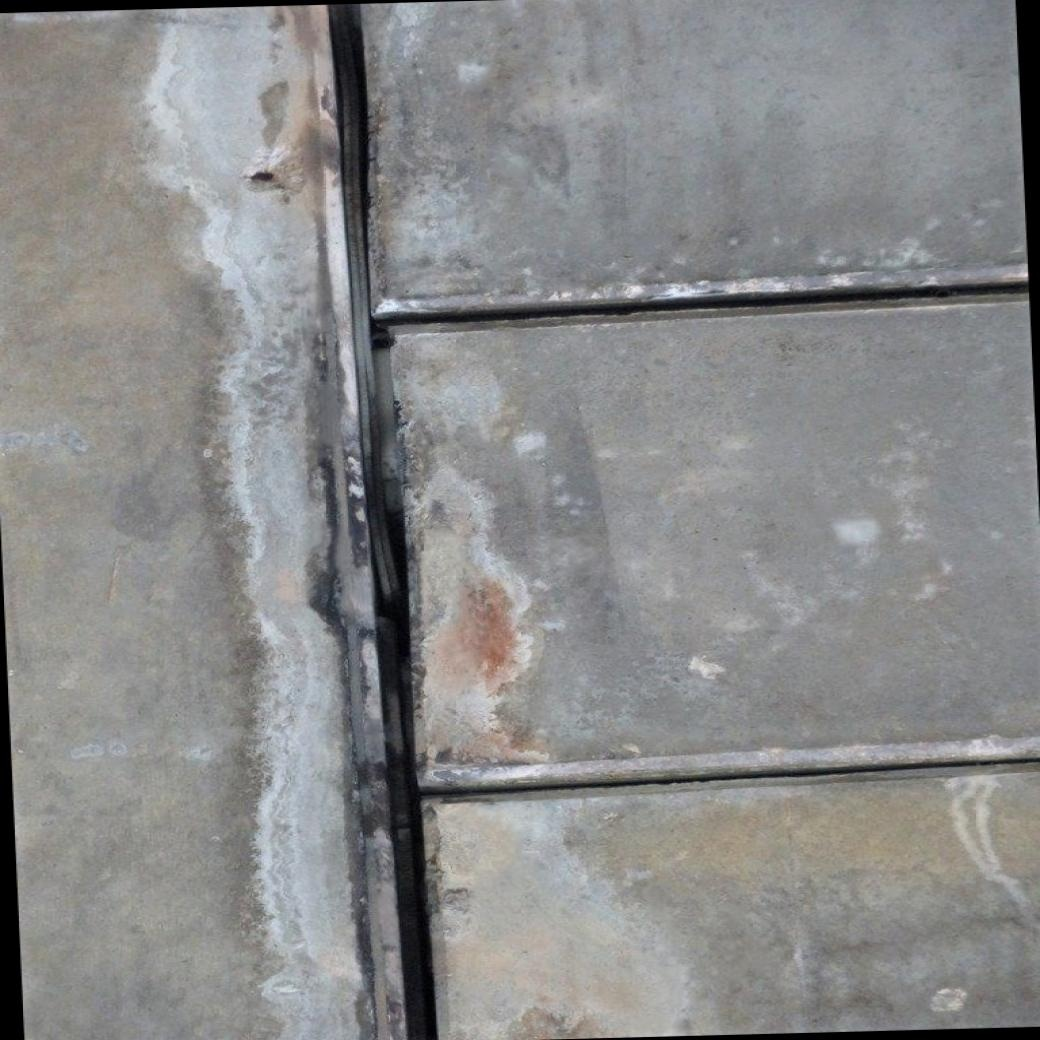

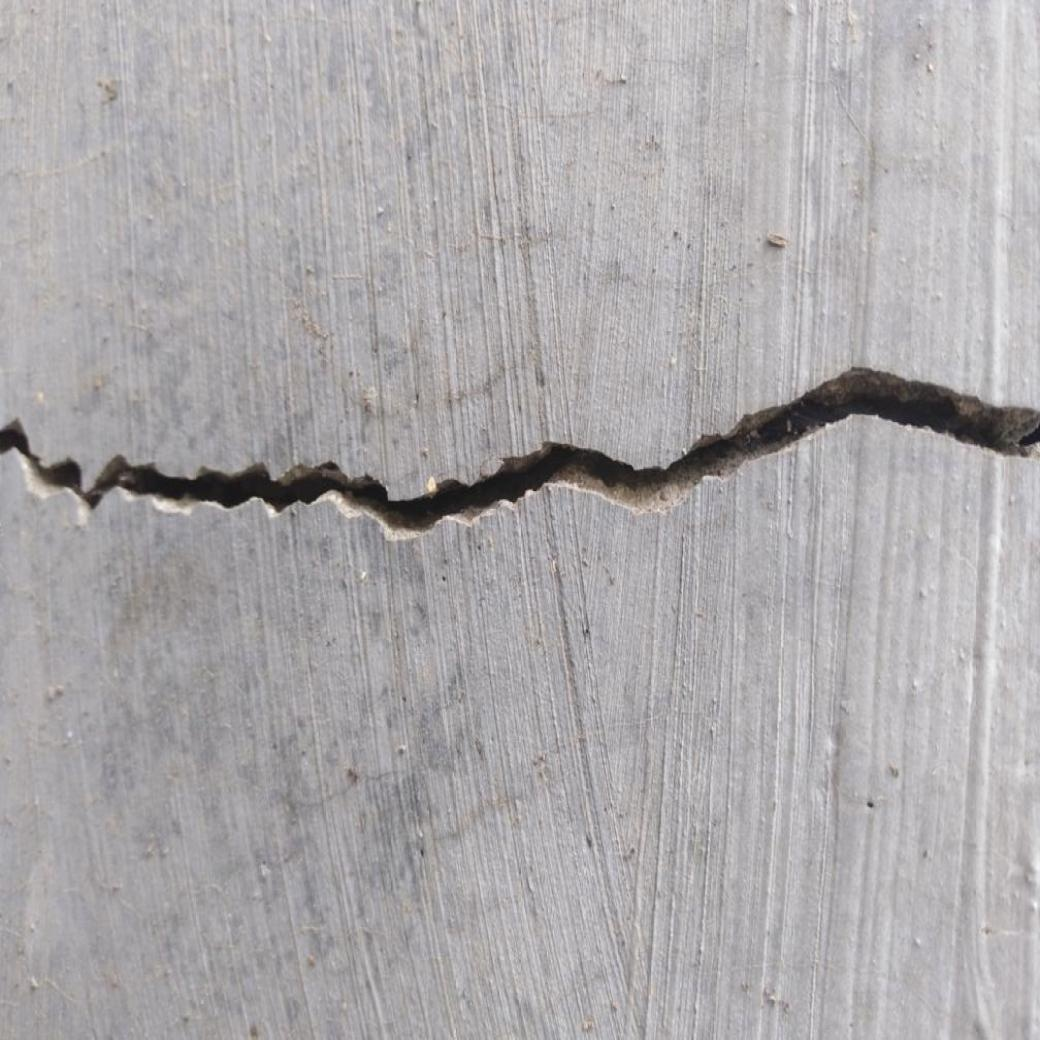

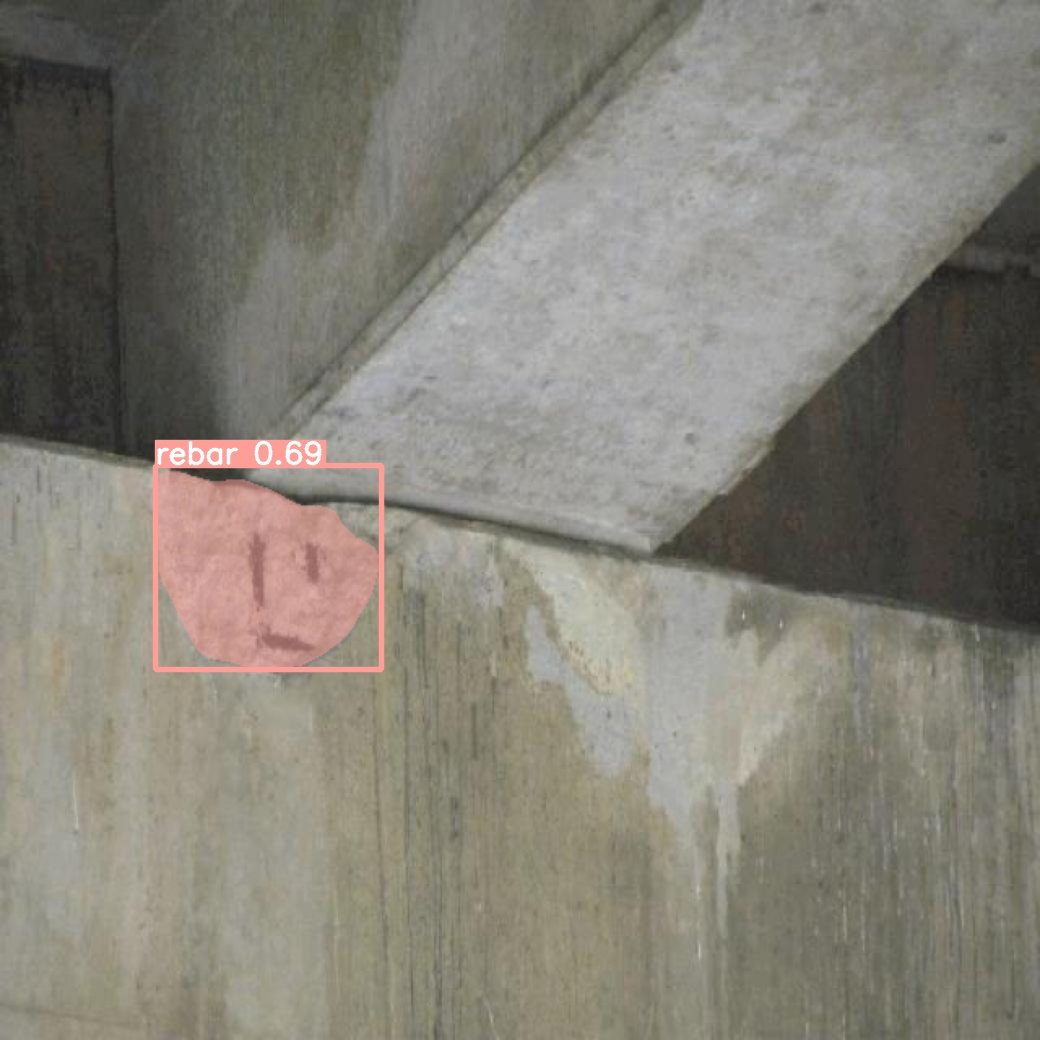

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:9]:
      display(Image(filename=image_path, height=600))
      print("\n")